In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31796aa84bcbb3cbeeb51914e16b61e6


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

kamenskoye ru
vesoul fr
cape town za
georgetown sh
georgetown sh
jalu ly
mys shmidta ru
port alfred za
pitimbu br
ancud cl
svetlaya ru
itoman jp
punta arenas cl
esperance au
bredasdorp za
nizhneyansk ru
nizhneyansk ru
lerwick gb
vila franca do campo pt
barentsburg sj
ust-kuyga ru
inhambane mz
port alfred za
ulcinj me
beringovskiy ru
rikitea pf
umm lajj sa
belushya guba ru
vaini to
illoqqortoormiut gl
mataura pf
mao td
kapaa us
puerto ayora ec
robertsport lr
punta arenas cl
korla cn
hilo us
vestmannaeyjar is
belushya guba ru
belushya guba ru
provideniya ru
launceston au
bengkulu id
dikson ru
rikitea pf
cape town za
nguiu au
busselton au
mitu co
alasehir tr
punta arenas cl
coleraine gb
palmer us
lalmanir hat bd
dikson ru
nanortalik gl
havre-saint-pierre ca
cusuna hn
ushuaia ar
ca mau vn
hobart au
formosa do rio preto br
karratha au
puerto ayora ec
atuona pf
pierre us
nam tha la
mount gambier au
opuwo na
amapa br
esperance au
cape town za
mataura pf
georgetown sh
narsaq gl
belushya guba r

belushya guba ru
saleaula ws
qaanaaq gl
cedral mx
georgetown sh
qaqortoq gl
butaritari ki
inhambane mz
yellowknife ca
hobart au
dingle ie
wenling cn
puerto ayora ec
vaini to
olinda br
westport ie
punta arenas cl
tual id
ponta delgada pt
berlevag no
hithadhoo mv
san matias bo
khatanga ru
punta arenas cl
eravur lk
taolanaro mg
hithadhoo mv
rikitea pf
mareeba au
albany au
tsihombe mg
cherskiy ru
mys shmidta ru
butterworth za
butaritari ki
tiksi ru
wahran dz
mataura pf
bafata gw
puerto ayora ec
zhigansk ru
ketchikan us
rikitea pf
bluff nz
punta arenas cl
nikolskoye ru
tuktoyaktuk ca
ushuaia ar
tilichiki ru
cape town za
waipawa nz
pattani th
rikitea pf
punta arenas cl
nisia floresta br
staryy nadym ru
honiara sb
san lawrenz mt
hithadhoo mv
puerto ayora ec
araouane ml
puerto escondido mx
general roca ar
puerto ayora ec
tura ru
pacasmayo pe
barrow us
east london za
punta arenas cl
port shepstone za
geraldton au
illoqqortoormiut gl
kodiak us
te anau nz
makakilo city us
shetpe kz
punta arenas c

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    # Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | kamenskoye
City not found. Skipping...
Processing Record 2 of Set 13 | vesoul
Processing Record 3 of Set 13 | cape town
Processing Record 4 of Set 13 | georgetown
Processing Record 5 of Set 13 | jalu
Processing Record 6 of Set 13 | mys shmidta
City not found. Skipping...
Processing Record 7 of Set 13 | port alfred
Processing Record 8 of Set 13 | pitimbu
Processing Record 9 of Set 13 | ancud
Processing Record 10 of Set 13 | svetlaya
Processing Record 11 of Set 13 | itoman
Processing Record 12 of Set 13 | punta arenas
Processing Record 13 of Set 13 | esperance
Processing Record 14 of Set 13 | bredasdorp
Processing Record 15 of Set 13 | nizhneyansk
City not found. Skipping...
Processing Record 16 of Set 13 | lerwick
Processing Record 17 of Set 13 | vila franca do campo
Processing Record 18 of Set 13 | barentsburg
City not found. Skipping...
Processing Record 19 of Set 13 | ust-kuyga
Processing Reco

Processing Record 29 of Set 16 | el copey
Processing Record 30 of Set 16 | tevaitoa
Processing Record 31 of Set 16 | takoradi
Processing Record 32 of Set 16 | voh
Processing Record 33 of Set 16 | demyansk
Processing Record 34 of Set 16 | bismarck
Processing Record 35 of Set 16 | luderitz
Processing Record 36 of Set 16 | simpang
Processing Record 37 of Set 16 | totness
Processing Record 38 of Set 16 | sault sainte marie
Processing Record 39 of Set 16 | orizona
Processing Record 40 of Set 16 | humaita
Processing Record 41 of Set 16 | ewa beach
Processing Record 42 of Set 16 | bonavista
Processing Record 43 of Set 16 | codrington
Processing Record 44 of Set 16 | egvekinot
Processing Record 45 of Set 16 | russell
Processing Record 46 of Set 16 | juba
Processing Record 47 of Set 16 | rawson
Processing Record 48 of Set 16 | cabo san lucas
Processing Record 49 of Set 16 | san quintin
Processing Record 50 of Set 16 | hermanus
Processing Record 1 of Set 17 | port-cartier
Processing Record 2 of 

Processing Record 15 of Set 20 | inta
Processing Record 16 of Set 20 | panjab
Processing Record 17 of Set 20 | aripuana
Processing Record 18 of Set 20 | geraldton
Processing Record 19 of Set 20 | vanimo
Processing Record 20 of Set 20 | hurricane
Processing Record 21 of Set 20 | zeya
Processing Record 22 of Set 20 | camopi
Processing Record 23 of Set 20 | whitehorse
Processing Record 24 of Set 20 | kloulklubed
Processing Record 25 of Set 20 | nara
Processing Record 26 of Set 20 | port macquarie
Processing Record 27 of Set 20 | piscolt
Processing Record 28 of Set 20 | qingyuan
Processing Record 29 of Set 20 | aklavik
Processing Record 30 of Set 20 | taunggyi
Processing Record 31 of Set 20 | camana
Processing Record 32 of Set 20 | marawi
Processing Record 33 of Set 20 | saleaula
City not found. Skipping...
Processing Record 34 of Set 20 | cedral
Processing Record 35 of Set 20 | qaqortoq
Processing Record 36 of Set 20 | wenling
Processing Record 37 of Set 20 | westport
Processing Record 38

Processing Record 1 of Set 24 | linxia
Processing Record 2 of Set 24 | poum
Processing Record 3 of Set 24 | gobabis
Processing Record 4 of Set 24 | sao caetano de odivelas
Processing Record 5 of Set 24 | labuhan
Processing Record 6 of Set 24 | nelson bay
Processing Record 7 of Set 24 | quepos
Processing Record 8 of Set 24 | ambulu
Processing Record 9 of Set 24 | christchurch
Processing Record 10 of Set 24 | veraval
Processing Record 11 of Set 24 | polovinnoye
Processing Record 12 of Set 24 | port hawkesbury
Processing Record 13 of Set 24 | ono
Processing Record 14 of Set 24 | beruni
City not found. Skipping...
Processing Record 15 of Set 24 | shelbyville
Processing Record 16 of Set 24 | svecha
Processing Record 17 of Set 24 | great yarmouth
Processing Record 18 of Set 24 | fortuna
Processing Record 19 of Set 24 | manggar
Processing Record 20 of Set 24 | bure
Processing Record 21 of Set 24 | iqaluit
Processing Record 22 of Set 24 | sehithwa
Processing Record 23 of Set 24 | yelovo
Proces

In [11]:
city_data

[{'City': 'Vesoul',
  'Lat': 47.5833,
  'Lng': 5.8333,
  'Max Temp': 43.09,
  'Humidity': 79,
  'Cloudiness': 100,
  'Wind Speed': 9.08,
  'Country': 'FR',
  'Date': '2022-04-05 06:37:54'},
 {'City': 'Cape Town',
  'Lat': -33.9258,
  'Lng': 18.4232,
  'Max Temp': 61.11,
  'Humidity': 89,
  'Cloudiness': 75,
  'Wind Speed': 12.66,
  'Country': 'ZA',
  'Date': '2022-04-05 06:36:21'},
 {'City': 'Georgetown',
  'Lat': 5.4112,
  'Lng': 100.3354,
  'Max Temp': 85.98,
  'Humidity': 70,
  'Cloudiness': 40,
  'Wind Speed': 3.44,
  'Country': 'MY',
  'Date': '2022-04-05 06:36:43'},
 {'City': 'Jalu',
  'Lat': 29.0331,
  'Lng': 21.5482,
  'Max Temp': 90.05,
  'Humidity': 8,
  'Cloudiness': 0,
  'Wind Speed': 6.55,
  'Country': 'LY',
  'Date': '2022-04-05 06:37:55'},
 {'City': 'Port Alfred',
  'Lat': -33.5906,
  'Lng': 26.891,
  'Max Temp': 67.17,
  'Humidity': 75,
  'Cloudiness': 0,
  'Wind Speed': 4,
  'Country': 'ZA',
  'Date': '2022-04-05 06:37:56'},
 {'City': 'Pitimbu',
  'Lat': -7.4706,
  'Ln

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vesoul,47.5833,5.8333,43.09,79,100,9.08,FR,2022-04-05 06:37:54
1,Cape Town,-33.9258,18.4232,61.11,89,75,12.66,ZA,2022-04-05 06:36:21
2,Georgetown,5.4112,100.3354,85.98,70,40,3.44,MY,2022-04-05 06:36:43
3,Jalu,29.0331,21.5482,90.05,8,0,6.55,LY,2022-04-05 06:37:55
4,Port Alfred,-33.5906,26.8910,67.17,75,0,4.00,ZA,2022-04-05 06:37:56
5,Pitimbu,-7.4706,-34.8086,73.99,80,38,8.66,BR,2022-04-05 06:37:57
6,Ancud,-41.8697,-73.8203,57.22,98,100,11.74,CL,2022-04-05 06:37:57
7,Svetlaya,46.5389,138.3297,41.88,86,100,21.97,RU,2022-04-05 06:37:58
8,Itoman,26.1247,127.6694,73.78,51,40,10.36,JP,2022-04-05 06:37:58
9,Punta Arenas,-53.1500,-70.9167,37.51,81,40,27.63,CL,2022-04-05 06:36:00


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vesoul,FR,2022-04-05 06:37:54,47.5833,5.8333,43.09,79,100,9.08
1,Cape Town,ZA,2022-04-05 06:36:21,-33.9258,18.4232,61.11,89,75,12.66
2,Georgetown,MY,2022-04-05 06:36:43,5.4112,100.3354,85.98,70,40,3.44
3,Jalu,LY,2022-04-05 06:37:55,29.0331,21.5482,90.05,8,0,6.55
4,Port Alfred,ZA,2022-04-05 06:37:56,-33.5906,26.8910,67.17,75,0,4.00


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [20]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1649169283.774467

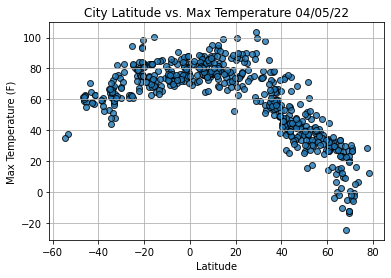

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

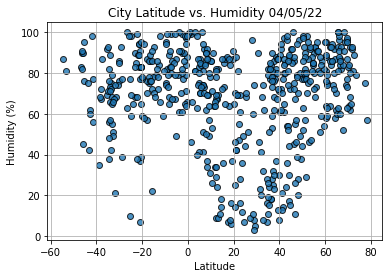

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

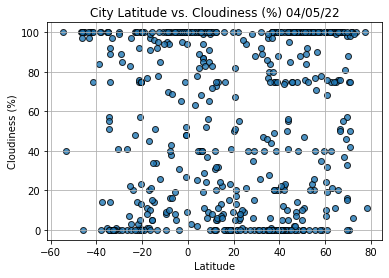

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

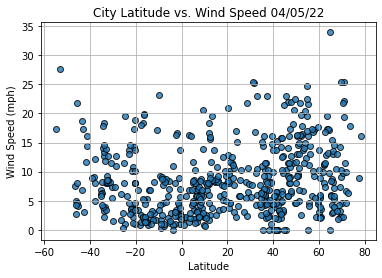

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()